CLAHE (Contrast Limited Adaptive Histogram Equalization) for improving contrast.CLAHE function is designed for the Grayscale ,But we can seperate eacch channel to LAB and apply for RGB aswell.

In [17]:
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image CLAHE')

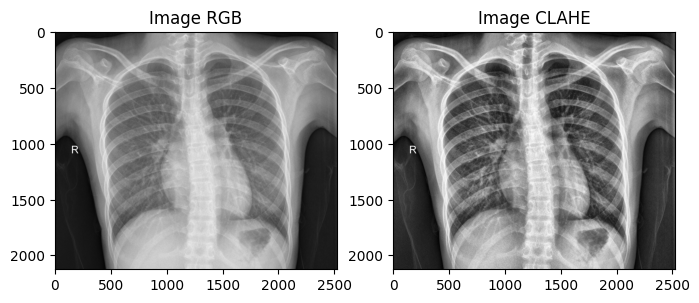

In [19]:
image = cv2.imread("./data/IM-0028-0001.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
grey = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
ch1 = CLAHE.apply(grey)

cv2.imwrite("./data/IM-0028-0001_clahe.jpeg", ch1)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Image RGB")

plt.subplot(1,2,2)
plt.imshow(ch1, cmap="gray")
plt.title("Image CLAHE")